<a href="https://colab.research.google.com/github/iamatul1214/tensorflow/blob/main/Mnist_data_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [87]:
## Let's check the tensorflow version
tf.__version__

'2.8.0'

In [88]:
tf.config.list_physical_devices('GPU')   ## It will print the GPUs connected

[]

In [89]:
## Let's take a dataset called mnist dataset, which is already provided by the keras. Keras is a high level wrapper API, which is built over tensorflow.
mnist = tf.keras.datasets.mnist

In [90]:
## Let's divide the data for training and testing set, load_data() will download the mnist dataset.
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()


In [91]:
## Let's check the shape of the x_train
x_train_full.shape

(60000, 28, 28)

### As we saw, the shape of data is (60000,28,28) which means there are 60000 images with size of 28 x 28. Means, we have 28 x 28 matrix for data points. As an image is collection of matrix only. If it is RGB image then there will be 28 x 28 matrix with 3 layers, one for R, one for G and one for B.

In [92]:
x_test.shape    ## We have 10000 images for the testing

(10000, 28, 28)

In [93]:
img = x_train_full[0]
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

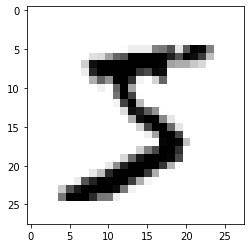

In [94]:
plt.imshow(img, cmap='binary')

### The above image shows that the number is 5. Now we will plot the heatmap to see the pixel intensity. But there, we will normalize the pixels into 0 to 1 by dividing image by 255 as the enitre matrix will get divided by 255. Since, the matrix is ranged between 0 to 255. Hence, dividing it by 255 will be normalize the values between 0 and 1.

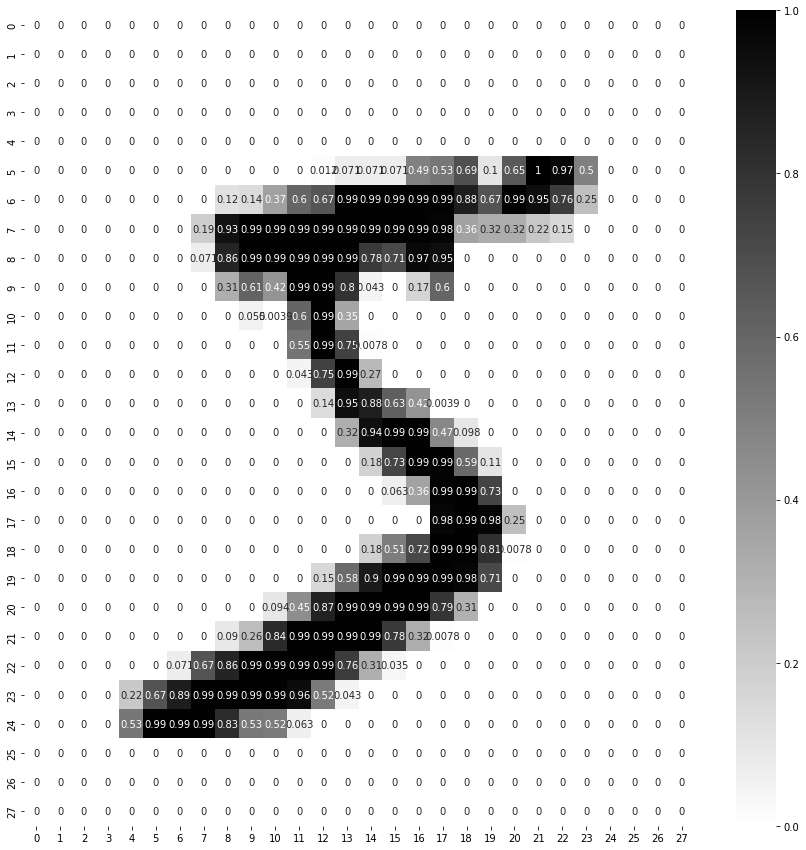

In [95]:
plt.figure(figsize=(15,15))
sns.heatmap(img/255, annot=True, cmap='binary')

### As we observed in above heatmap that, the black region is the area with maximum value, hence, max intensity.

In [96]:
x_valid, x_train = x_train_full[:5000] / 255, x_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]



x_test = x_test / 255

In [97]:
x_test.shape

(10000, 28, 28)

In [98]:
## Since, there are 10 class to be predicted. 0,1,2,3,4,5,6,7,8,9

In [99]:
Classes = 10

LAYERS = [
          tf.keras.layers.Flatten(input_shape = (28,28), name = "inputlayer"),
          tf.keras.layers.Dense(300, activation = "relu", name = "Hiddenlayer1"),
          tf.keras.layers.Dense(100, activation = "relu", name = "Hiddenlayer2"),
          tf.keras.layers.Dense(Classes, activation = "softmax", name = "outputlayer"),

]

## The first layer is always the flattening layer. Here, we will convert the two,thrid dimensional matrixes into the 1 dimensional
# Dense layer is the individual layer. Hidden layer has 300 neurons. In order to decide number of hidden layers and neurons, we need to to hyperparamter tuning.
## Second hidden layer has 100 neurons
## Third layer is the output layer here, we have 10 neuron which are because we have 10 classes, so each neuron for each class.

In [100]:
model = tf.keras.models.Sequential(LAYERS)    ## we are creating the model here using the layers. Sequential means all the layers(input,output and hidden) are used in one sequence to create model

In [101]:
model.layers    ## Let's check the model layers again

In [102]:
## Let's see model summary in this way as well
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 Hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 Hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Now let's try to understand the vlaues of params, what are those and why that number of paramters are given.
### we have 60000 images to train and by default our batch size is 32. Means in one batch we will have only 32 images. So now divide batch size with total images to find out how many batches we will have.
### total batches = total images / batch size => 60000/32 = 1875.0
### Which means now we will have 1875 batches of 32 images each.
### Now let's define steps per epoch. so each epoch is equal to one iteration. so there will be 1875 steps per epoch. Now what does it mean? It means in one epoch/iteration 1875 batches will be passed for training with 32 images each.

## Now let's see how many weights and biases are required.

### flatten layer has 784 datapoints, so 784 * 300 (weights because we have 300 neurons in first hidden layer) + 300 biases (each neuron to have one bias)=235500 parameters to train
### Hidden layer 2 has 100 neurons so 100 biases and for weights we have 300 neurons from hidden layer 1 and 100 neurons in hidden layer 2. Since, we know each neuron holds one weights so total weight of hidden layer 2 = 300 * 100 + 100 biases = 30100 parameters to train

### output layer we have 10 neurons so 100 * 10 + 10 = 1010 parameters to train

## Total paramters to train = 235500 + 30100 + 1010 =  266610

In [103]:
## Let's retrieve the weights and biases of layers
weights,biases = model.layers[1].get_weights()
print("weights shape = ",weights.shape)
print("bias shape=",biases.shape)

weights shape =  (784, 300)
bias shape= (300,)


In [104]:
for i in range(len(model.layers)):
  print(f"Layer {i} has weights {model.layers[i].get_weights()}")

Layer 0 has weights []
Layer 1 has weights [array([[-0.05560269, -0.07273838, -0.01505103, ..., -0.01700682,
        -0.00958116,  0.0130325 ],
       [ 0.0713328 ,  0.03702372,  0.03124115, ..., -0.02434217,
         0.06958355, -0.05723915],
       [ 0.01900434,  0.06510966,  0.00016503, ...,  0.04432156,
         0.03012384, -0.07234976],
       ...,
       [ 0.02630795, -0.00168081, -0.06725898, ...,  0.05249092,
         0.04818793,  0.04152451],
       [ 0.05654795, -0.02611512,  0.02705564, ..., -0.0399984 ,
         0.01621602, -0.06073945],
       [ 0.04398488, -0.00511001,  0.01607725, ..., -0.02472538,
         0.03424483,  0.06195204]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 

In [105]:

## Now let's create other paramters for our models, like loss, optimiser and metrics
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

In [106]:
EPOCHS = 30
VALIDATION = (x_valid,y_valid)

history = model.fit(x_train,y_train, epochs=EPOCHS, validation_data = VALIDATION)

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5891 - accuracy: 0.8503 - val_loss: 0.2999 - val_accuracy: 0.9184
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2863 - accuracy: 0.9186 - val_loss: 0.2399 - val_accuracy: 0.9336
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2356 - accuracy: 0.9327 - val_loss: 0.2004 - val_accuracy: 0.9442
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2023 - accuracy: 0.9421 - val_loss: 0.1766 - val_accuracy: 0.9502
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1759 - accuracy: 0.9496 - val_loss: 0.1601 - val_accuracy: 0.9568
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1550 - accuracy: 0.9566 - val_loss: 0.1430 - val_accuracy: 0.9616
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1380 - accuracy: 0.9614 - val_loss: 0.1297 - val_accuracy:

In [107]:
## Let's see what history stores
type(history.history)

dict

In [108]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [109]:
## Let's convert the history dictionary into dataframe
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.589087,0.850345,0.299882,0.9184
1,0.286253,0.918618,0.239878,0.9336
2,0.235559,0.932745,0.200380,0.9442
3,0.202261,0.942091,0.176622,0.9502
4,0.175865,0.949564,0.160124,0.9568
5,0.155027,0.956636,0.143009,0.9616
6,0.137958,0.961400,0.129733,0.9662
7,0.124727,0.964655,0.121336,0.9674
8,0.113060,0.968309,0.114765,0.9680
9,0.103284,0.971673,0.105697,0.9706


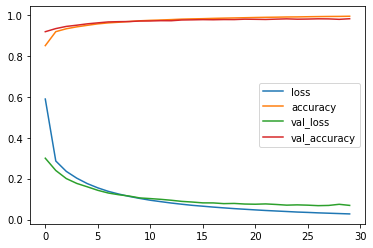

In [110]:
## Now let's plot it and check the losses
pd.DataFrame(history.history).plot()

In [111]:
## Let's check the accuracy of the testing data
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0702 - accuracy: 0.9777


[0.07022834569215775, 0.9776999950408936]

In [112]:
## we got 97 percent accuracy for the x_test data as well

## Now let's do prediction on some data points from the x_test

x_new_test = x_test[:5]

y_prob = model.predict(x_new_test)

y_prob     ## It is printing the probability of each class but let's get the max probability out of it.

array([[5.72086549e-07, 7.43267634e-08, 8.38406777e-06, 1.82315562e-04,
        7.09522840e-09, 1.08913355e-06, 9.20583471e-11, 9.99780834e-01,
        2.12182067e-06, 2.45705032e-05],
       [2.01350730e-07, 1.51456872e-04, 9.99655008e-01, 1.83167242e-04,
        3.32970760e-12, 3.89605432e-08, 9.63697130e-06, 2.32010743e-12,
        4.61739347e-07, 2.15672776e-13],
       [1.56001647e-06, 9.97282982e-01, 3.48239148e-04, 3.91171925e-05,
        7.88120495e-04, 1.14058121e-05, 3.56580713e-05, 7.63919204e-04,
        7.25847785e-04, 3.00164129e-06],
       [9.99939680e-01, 1.27942510e-08, 4.20070864e-05, 1.02224965e-06,
        7.00486957e-09, 5.81088671e-07, 7.93867457e-06, 5.56080886e-06,
        1.59119162e-09, 3.22254164e-06],
       [5.83118390e-06, 6.95724054e-07, 5.73445459e-06, 1.18720456e-08,
        9.99093890e-01, 1.67176751e-07, 9.90586414e-05, 1.05699684e-04,
        2.28211720e-05, 6.66092732e-04]], dtype=float32)

In [114]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred   ## These are the classes being predicted

array([7, 2, 1, 0, 4])

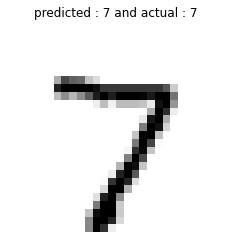

------------------------------------------------------------------------------------------------------------------------


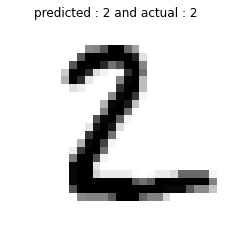

------------------------------------------------------------------------------------------------------------------------


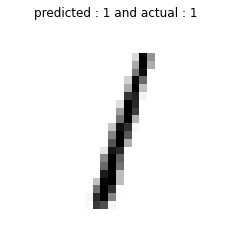

------------------------------------------------------------------------------------------------------------------------


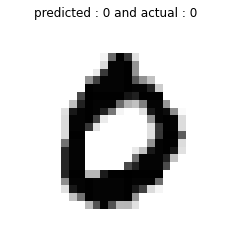

------------------------------------------------------------------------------------------------------------------------


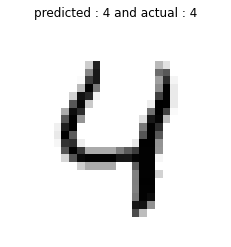

------------------------------------------------------------------------------------------------------------------------


In [116]:
for img, pred,actual in zip(x_new_test,Y_pred,y_test[:5]):
  plt.imshow(img, cmap="binary")
  plt.title(f"predicted : {pred} and actual : {actual}")
  plt.axis("off")
  plt.show()
  print("----"*30)

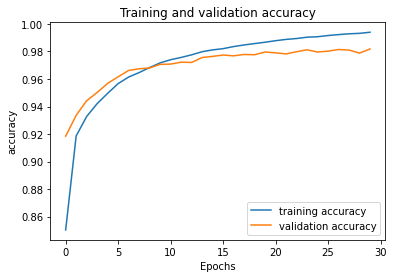

In [126]:
## Let's plot the epoch vs loss graph

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(EPOCHS)
plt.plot(epochs, train_accuracy, label = "training accuracy")
plt.plot(epochs,val_accuracy, label="validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

list